In [546]:
import pandas as pd
df = pd.read_json('mpcorb_extended.json.gz')

In [547]:
df.columns

Index(['Critical_list_numbered_object_flag', 'H', 'G', 'Num_obs', 'rms', 'U',
       'Arc_years', 'Perturbers', 'Perturbers_2', 'Number', 'Name',
       'Principal_desig', 'Other_desigs', 'Epoch', 'M', 'Peri', 'Node', 'i',
       'e', 'n', 'a', 'Ref', 'Num_opps', 'Computer', 'Hex_flags', 'Last_obs',
       'Tp', 'Orbital_period', 'Perihelion_dist', 'Aphelion_dist',
       'Semilatus_rectum', 'Synodic_period', 'Orbit_type', 'NEO_flag',
       'One_km_NEO_flag', 'PHA_flag', 'One_opposition_object_flag',
       'Arc_length'],
      dtype='object')

In [548]:
desdf = df[["Principal_desig", "a", "e", "i", "Node", "Peri", "M", "Epoch"]].rename(
    columns=dict(Principal_desig="ObjID", i="inc", Node="node", Peri="argPeri", M="ma", Epoch="epochMJD_TDB"))
desdf["epochMJD_TDB"] -= 2400000.5
desdf["FORMAT"] = "KEP"
desdf = desdf.loc[~(desdf["ObjID"] == "1930 BM")] ## Remove Pluto
desdf

,ObjID,a,e,inc,node,argPeri,ma,epochMJD_TDB,FORMAT
0,A801 AA,2.766620,0.079184,10.58790,80.25414,73.28578,145.84905,60600.0,KEP
1,A802 FA,2.770344,0.230438,34.92186,172.90614,310.89226,126.06756,60600.0,KEP
2,A804 RA,2.670187,0.256109,12.98815,169.83829,247.81974,127.32529,60600.0,KEP
3,A807 FA,2.360925,0.090001,7.14399,103.70471,151.67632,278.02316,60600.0,KEP
4,A845 XA,2.576221,0.187337,5.35896,141.45931,359.26459,38.63759,60600.0,KEP
...,...,...,...,...,...,...,...,...,...
1386200,2021 CS10,1.705880,0.052628,29.38693,119.89392,223.65372,164.66648,59260.0,KEP
1386201,2021 CA16,1.856075,0.047550,24.84879,95.72419,227.21125,177.55080,59260.0,KEP
1386202,2021 DB,2.393944,0.385839,23.84841,225.43635,250.60918,6.51092,59260.0,KEP
1386203,2021 FB3,2.185987,0.315277,52.54222,168.74816,347.30825,356.00787,59280.0,KEP


In [549]:
desdf.iloc[1000:11000].to_csv("mpcorb.csv", index=False)

In [163]:
desdf.iloc[1000:1000+1_200_000].to_csv("mpcorb.csv", index=False)

In [92]:
desdf.iloc[1000:-20000].to_csv("mpcorb.csv", index=False)

In [78]:
desdf["epochMJD_TDB"][-20_000:].min()

25067.0

## Comparison with Sorcha

In [26]:
df = pd.read_csv("testrun_e2e.csv")
df

,ObjID,FieldID,fieldMJD_TAI,fieldJD_TDB,Range_LTC_km,RangeRate_LTC_km_s,RATrue_deg,RARateCosDec_deg_day,DecTrue_deg,DecRate_deg_day,...,SNR,PSFMagSigma,trailedSourceMag,PSFMag,RA_deg,Dec_deg,detectorID,object_linked,date_linked_MJD,Obj_Sun_LTC_km
0,2011_OB60,5736,60225.247168,2.460226e+06,5.381400e+09,8.911895,1.982561,-0.019103,-11.895495,-0.008133,...,16.585085,0.063567,22.457353,22.537312,1.982564,-11.895487,143.0,True,60228.0,5.521397e+09
1,2011_OB60,5786,60225.270947,2.460226e+06,5.381419e+09,8.970787,1.982098,-0.019067,-11.895689,-0.008121,...,7.285457,0.139649,22.605520,22.603568,1.982123,-11.895708,142.0,True,60228.0,5.521396e+09
2,2011_OB60,5812,60225.282702,2.460226e+06,5.381428e+09,8.997821,1.981869,-0.019047,-11.895784,-0.008115,...,8.712073,0.117976,22.260850,22.427162,1.981867,-11.895779,142.0,True,60228.0,5.521396e+09
3,2011_OB60,7438,60227.244719,2.460228e+06,5.382986e+09,9.890005,1.944405,-0.018894,-11.911533,-0.007840,...,14.361298,0.073086,22.592595,22.605653,1.944409,-11.911546,129.0,True,60228.0,5.521324e+09
4,2011_OB60,7488,60227.268431,2.460228e+06,5.383006e+09,9.947928,1.943947,-0.018857,-11.911719,-0.007827,...,13.159019,0.079524,22.538918,22.477342,1.943954,-11.911718,129.0,True,60228.0,5.521324e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,2011_OB60,212510,60574.274358,2.460575e+06,5.363042e+09,-0.223989,4.436954,-0.019622,-11.442597,-0.010235,...,8.427248,0.121748,22.469139,22.407737,4.436967,-11.442574,125.0,True,60228.0,5.509883e+09
638,2011_OB60,212559,60574.298016,2.460575e+06,5.363042e+09,-0.160221,4.436480,-0.019597,-11.442839,-0.010224,...,5.932847,0.169121,22.500056,22.282398,4.436465,-11.442826,69.0,True,60228.0,5.509883e+09
639,2011_OB60,215598,60582.214616,2.460583e+06,5.364155e+09,3.702268,4.279759,-0.019806,-11.521049,-0.009445,...,15.126066,0.069506,23.055008,23.161147,4.279771,-11.521048,158.0,True,60228.0,5.509649e+09
640,2011_OB60,215599,60582.215067,2.460583e+06,5.364155e+09,3.703596,4.279750,-0.019806,-11.521053,-0.009444,...,16.046874,0.065636,22.927668,22.981540,4.279753,-11.521056,36.0,True,60228.0,5.509649e+09


<Axes: >

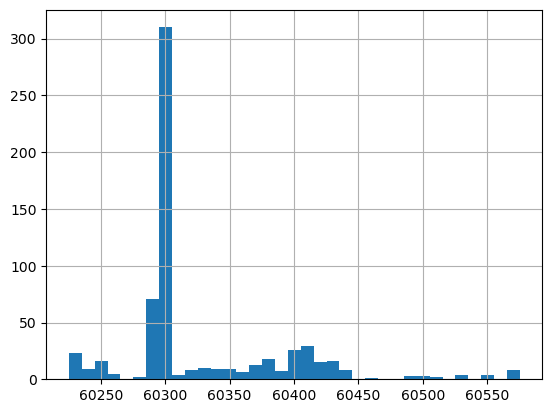

In [31]:
import numpy as np
tmin, tmax = df["fieldMJD_TAI"].min(), df["fieldMJD_TAI"].max()
df["fieldMJD_TAI"].hist(bins=np.arange(tmin, tmax, 10))

## Sizes

In [62]:
cheby_order=6
nobj = 10_000_000
floatbytes = 8

# size of each snapshot on disk
snap_gb = (cheby_order+1) * nobj * 3 * floatbytes / 1024 / 1024 / 1024
print(f"{snap_gb=:.3}")

# number of snapshots for 100 years, assuming 10 days/snapshot
nsnaps = 100*365//30
print(f"{nsnaps}")

# total size
cache_tb = snap_gb * nsnaps / 1024
print(f"{cache_tb=:.3}")

snap_gb=1.56
1216
cache_tb=1.86


In [ ]:
## data structure
## np.zeros((tslices, cheby_order+1, 3, nobj))

results[i0] = foo(p0)
results[i1] = foo(p1)
results[i2] = foo(p2)
...

for i, p in chebylist:
    results[i] = foo(p)

## Test

In [120]:
df = pd.read_csv('1949 MA.csv')
df

,Unnamed: 0,0,1,2
0,0,0.146636,0.207606,0.023006
1,1,0.145380,0.207581,0.023574
2,2,0.144121,0.207553,0.024142
3,3,0.142860,0.207521,0.024709
4,4,0.141597,0.207486,0.025275
...,...,...,...,...
965,965,-0.255903,-0.627244,-0.168320
966,966,-0.255735,-0.627875,-0.168682
967,967,-0.255567,-0.628505,-0.169043
968,968,-0.255399,-0.629134,-0.169405


<Axes: >

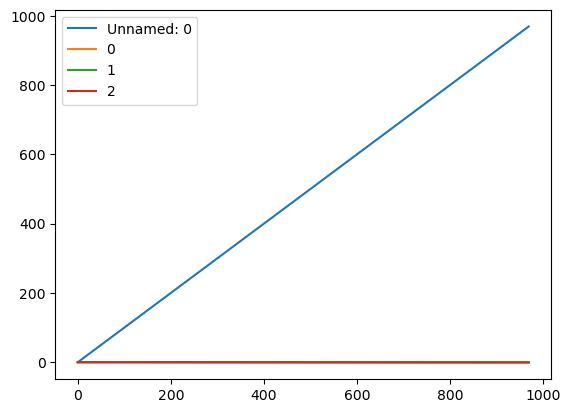

In [124]:
df.plot()

<Axes: >

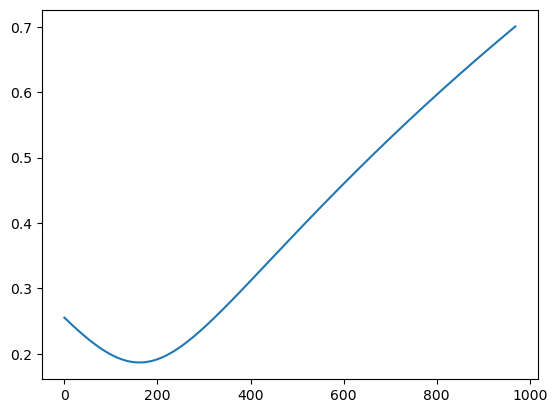

In [125]:
np.sqrt(df['0']**2 + df['1']**2 + df['2']**2).plot()

## SipceyPy tests

In [128]:
import spiceypy as spice

In [131]:
mu    =  3.9860043543609598E+05;
r     =  1.0e+08;
speed =  np.sqrt( mu / r );
t     =  spice.pi()*r/speed;

In [133]:
pvinit = np.zeros(6)
pvinit[0] =  0.0;
pvinit[1] =  r/np.sqrt(2.0);
pvinit[2] =  r/np.sqrt(2.0);
pvinit[3] =  0.0;
pvinit[4] = -speed/np.sqrt(2.0);
pvinit[5] =  speed/np.sqrt(2.0);

In [138]:
%%timeit
res = spice.prop2b(mu, pvinit, t)

6.32 μs ± 11.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [182]:
%%time
from astroquery.imcce import Skybot
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.units as u

field = SkyCoord(0*u.deg, 0*u.deg)
epoch = Time('1960-07-18 21:42', format='iso')
results = Skybot.cone_search(field, 60*u.arcmin, epoch, location='X05')

CPU times: user 75.9 ms, sys: 5.38 ms, total: 81.3 ms
Wall time: 35.1 s


In [180]:
results

Number,Name,RA,DEC,Type,V,posunc,centerdist,RA_rate,DEC_rate,geodist,heliodist,alpha,elong,x,y,z,vx,vy,vz,epoch
,,deg,deg,,mag,arcsec,arcsec,arcsec / h,arcsec / h,AU,AU,deg,deg,AU,AU,AU,AU / d,AU / d,AU / d,d
int64,str15,float64,float64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
--,2013 WD117,359.9215341666666,-3.194444444444445e-05,MB>Middle,22.8,16.898,282.477,22.901,14.618,1.53992758284,2.20088503295,24.44,116.73,1.977974634,-0.936932132,-0.414102623,0.002160052,0.010697011,0.005567626,2444430.0
--,2019 SB65,0.055943333333333324,-0.08704472222222222,MB>Middle,22.4,4.49,372.499,9.1595,11.451,1.91055793926,2.54213737596,21.0,116.64,2.331519246,-0.91360603,-0.416621869,0.003924987,0.00867946,0.005544868,2444430.0
--,2009 BD178,0.1135175,-0.021143611111111113,MB>Middle,22.3,0.875,415.691,2.9358,10.85,1.92634749695,2.55594971719,20.89,116.56,2.324866807,-0.898651299,-0.413232928,0.006314722,0.007295924,0.005417586,2444430.0
479500,2014 AW49,0.03639041666666666,-0.14533805555555557,MB>Inner,22.5,1.467,539.37,18.7407,1.815,1.58065901265,2.23753032641,24.02,116.68,1.999563141,-0.927451061,-0.396930195,0.004193576,0.010023557,0.003316168,2444430.0
--,2017 BH206,0.12962833333333335,0.09206222222222221,MB>Outer,23.5,43.917,572.378,-0.9545,5.729,3.03033824916,3.60850121055,14.63,116.5,3.465758455,-0.886563734,-0.403719968,0.002290401,0.006386156,0.00502466,2444430.0
--,2015 US111,359.90279499999997,0.1333352777777778,MB>Outer,22.6,2.936,594.025,7.9577,-2.075,2.54876947924,3.1472414889,16.81,116.7,2.979845979,-0.923434074,-0.377794562,0.002782993,0.009105677,0.00237046,2444430.0
610137,2005 XG124,0.10016333333333333,-0.13827472222222223,MB>Outer,21.5,2.334,614.67,4.9999,11.051,2.2622102459,2.87311612528,18.48,116.62,2.684531581,-0.90486291,-0.422771735,0.003740191,0.007996335,0.005938695,2444430.0
458667,2011 GV85,0.004092083333333333,-0.1741022222222222,MB>Outer,22.7,2.45,626.943,3.4944,1.241,2.8502076812,3.43737663798,15.34,116.72,3.289734868,-0.907491401,-0.40271736,0.001862246,0.0079014,0.003474369,2444430.0


## Healpix

In [5]:
import healpy as hp
import numpy as np

In [6]:
x, y, z = map(np.asarray, ([1, 0, 0], [0, 1, 0], [0, 0, 1]))
hp.vec2pix(64, x, y, z, nest=True)

array([18090, 22186,  4095])

In [9]:
import numpy as np

def generate_random_vectors_within_angle(original_vector, N, alpha):
    """
    Generates N random 3D unit vectors within an angle alpha from the original vector.
    
    Parameters:
    original_vector (numpy.ndarray): The original 3D unit vector.
    N (int): Number of random vectors to generate.
    alpha (float): Maximum angle in radians from the original vector.

    Returns:
    numpy.ndarray: An array of shape (N, 3) containing the generated vectors.
    """
    # Normalize the original vector to ensure it is a unit vector
    original_vector = original_vector / np.linalg.norm(original_vector)

    # Generate random angles theta and phi
    theta = np.arccos(np.random.uniform(np.cos(alpha), 1, N))
    phi = np.random.uniform(0, 2 * np.pi, N)

    # Convert spherical coordinates to Cartesian coordinates
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    random_vectors = np.stack((x, y, z), axis=-1)

    # Create a rotation matrix to align the z-axis with the original vector
    def rotation_matrix_from_vectors(vec1, vec2):
        a, b = (vec1 / np.linalg.norm(vec1)).reshape(3), (vec2 / np.linalg.norm(vec2)).reshape(3)
        v = np.cross(a, b)
        c = np.dot(a, b)
        s = np.linalg.norm(v)
        kmat = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
        rotation_matrix = np.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))
        return rotation_matrix

    # Rotate the random vectors to align with the original vector
    rotation_matrix = rotation_matrix_from_vectors(np.array([0, 0, 1]), original_vector)
    aligned_vectors = random_vectors.dot(rotation_matrix.T)

    return aligned_vectors

# Example usage
original_vector = np.array([1, 0, 0])  # Example original unit vector
N = 10  # Number of vectors to generate
alpha = np.pi / 6  # Maximum angle in radians (30 degrees)

random_vectors = generate_random_vectors_within_angle(original_vector, N, alpha)
print(random_vectors)


[[ 0.9534431  -0.30148231  0.00739386]
 [ 0.93533265 -0.29106486 -0.20108229]
 [ 0.9736005   0.1094392  -0.20031256]
 [ 0.96495966 -0.21554351 -0.14964575]
 [ 0.99125734  0.02109709 -0.13024514]
 [ 0.99448972  0.09709158 -0.03954005]
 [ 0.89708951  0.26915118  0.35041127]
 [ 0.97666577 -0.14985622  0.15384112]
 [ 0.91855812 -0.0528275   0.39174002]
 [ 0.99126831  0.07476125 -0.10861809]]


In [12]:
def rotation_matrix_from_vectors(vec1, vec2):
    a, b = (vec1 / np.linalg.norm(vec1)).reshape(3), (vec2 / np.linalg.norm(vec2)).reshape(3)
    v = np.cross(a, b)
    c = np.dot(a, b)
    s = np.linalg.norm(v)
    kmat = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
    rotation_matrix = np.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))
    return rotation_matrix

v1 = np.array([1, 0, 0])
v2 = np.array([1, 1, 0])

rotation_matrix_from_vectors(v1, v2)

array([[ 0.70710678, -0.70710678,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [52]:
import numpy as np

def rotation_matrices_to_align_with_x_axis(vectors):
    """
    Generates a list of rotation matrices that rotate the x-axis (1, 0, 0) onto each input vector.
    
    Parameters:
    vectors (numpy.ndarray): An array of shape (M, 3) containing the input 3D vectors.

    Returns:
    numpy.ndarray: An array of shape (M, 3, 3) containing the rotation matrices.
    """
    x_axis = np.array([1, 0, 0])
    a = np.tile(x_axis, (vectors.shape[0], 1))
    b = vectors / np.linalg.norm(vectors, axis=1)[:, np.newaxis]
    
    v = np.cross(a, b)
    c = np.einsum('ij,ij->i', a, b)
    s = np.linalg.norm(v, axis=1)
    
    kmat = np.zeros((vectors.shape[0], 3, 3))
    kmat[:, 0, 1] = -v[:, 2]
    kmat[:, 0, 2] = v[:, 1]
    kmat[:, 1, 0] = v[:, 2]
    kmat[:, 1, 2] = -v[:, 0]
    kmat[:, 2, 0] = -v[:, 1]
    kmat[:, 2, 1] = v[:, 0]
    
    identity = np.eye(3)
    identity = np.tile(identity, (vectors.shape[0], 1, 1))
    
    kmat_squared = np.einsum('...ij,...jk->...ik', kmat, kmat)
    
    rotation_matrices = identity + kmat + kmat_squared * ((1 - c) / (s ** 2))[:, np.newaxis, np.newaxis]
    
    # Handle the case where the input vector is parallel to the x-axis
    parallel_indices = np.where(s == 0)[0]
    rotation_matrices[parallel_indices] = np.eye(3)
    
    return rotation_matrices

# Example usage
input_vectors = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0],
])  # Example input vectors

rotation_matrices = rotation_matrices_to_align_with_x_axis(input_vectors)
for i, matrix in enumerate(rotation_matrices):
    print(f"Rotation matrix for vector {input_vectors[i]}:\n{matrix}\n")


Rotation matrix for vector [0 1 0]:
[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]

Rotation matrix for vector [0 0 1]:
[[ 0.  0. -1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]]

Rotation matrix for vector [1 0 0]:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Rotation matrix for vector [0 1 0]:
[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]



/var/folders/0n/3cchn_wj5619fqz4dswygvj80000gn/T/ipykernel_24694/4026715684.py:34: RuntimeWarning: invalid value encountered in divide
  rotation_matrices = identity + kmat + kmat_squared * ((1 - c) / (s ** 2))[:, np.newaxis, np.newaxis]


In [18]:
v1 = input_vectors[0]
v1.dot(rotation_matrices[0])

array([1., 0., 0.])

In [35]:
np.array([1, 0, 0]).dot(rotation_matrices[1].T)

array([0., 0., 1.])

In [61]:
xx = np.array([
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0]
])
R = rotation_matrices
np.dot(rotation_matrices, xx)

ValueError: shapes (4,3,3) and (4,3) not aligned: 3 (dim 2) != 4 (dim 0)

In [45]:
xx[0], R[0]

(array([1, 0, 0]),
 array([[ 0., -1.,  0.],
        [ 1.,  0.,  0.],
        [ 0.,  0.,  1.]]))

In [49]:
R[0] @ xx[0]

array([0., 1., 0.])

In [53]:
rotation_matrices.shape

(4, 3, 3)

In [63]:
result = np.einsum('ijk,ik->ij', rotation_matrices, xx)
result

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [60]:
rotation_matrices.shape, xx.shape

((4, 3, 3), (3, 3))

In [66]:
import numpy as np

# Example data
N = 4   # Number of rotation matrices
M = 5   # Number of vectors per rotation matrix

# Generate random rotation matrices (N, 3, 3)
rotation_matrices = np.random.rand(N, 3, 3)

# Generate random unit vectors (N, M, 3)
vectors = np.random.rand(N, M, 3)
vectors /= np.linalg.norm(vectors, axis=-1, keepdims=True)  # Normalize to unit vectors

# Perform the batch matrix-vector multiplication
# Shape (N, M, 3) = (N, 1, 3, 3) @ (N, M, 3, 1)
result = np.einsum('nij,nmj->nmi', rotation_matrices, vectors)

# Verify the shape
print(result.shape)  # Should be (N, M, 3)
print(result)

(4, 5, 3)
[[[0.68230713 1.12817877 0.80273685]
  [0.87253749 1.27297747 0.60806246]
  [0.61735113 0.72726561 0.6892953 ]
  [0.67960524 0.76924954 0.61768902]
  [0.85637882 1.13261205 0.55974445]]

 [[0.66992284 0.5745367  0.75565674]
  [0.8039158  0.52532227 0.71498413]
  [0.50430161 0.91471296 0.67468383]
  [0.8537417  0.16519554 0.63277185]
  [0.6128414  0.600294   0.73443697]]

 [[1.0653532  0.88100289 1.2383985 ]
  [1.01005022 0.82638782 1.2304612 ]
  [0.91586187 0.83929298 1.12641604]
  [1.02253573 0.62086284 1.07903186]
  [0.8816504  0.8571641  1.07452414]]

 [[0.71094173 0.32409703 0.47629816]
  [1.04946863 0.73524563 0.98822627]
  [1.07439673 0.67969609 0.98561187]
  [1.07771221 0.74130439 1.04166782]
  [1.00845349 0.75320582 1.03266703]]]


In [1]:
##########################

In [2]:
import numpy as np

def rotation_matrices_to_z(vectors):
    # Ensure vectors are normalized
    vectors = vectors / np.linalg.norm(vectors, axis=1)[:, np.newaxis]

    # Components of the input vectors
    x, y, z = vectors[:, 0], vectors[:, 1], vectors[:, 2]

    # Compute cosine and sine of the rotation angle
    cos_theta = z
    sin_theta = np.sqrt(1 - z**2)

    # Avoid division by zero for small angles
    sin_theta = np.where(sin_theta == 0, 1, sin_theta)
    
    # Compute the components of the cross product of (0, 0, 1) and the input vectors
    kx, ky, kz = -y / sin_theta, x / sin_theta, np.zeros_like(z)

    # Create the skew-symmetric cross-product matrices
    K = np.zeros((vectors.shape[0], 3, 3))
    K[:, 0, 1] = -kz
    K[:, 0, 2] = ky
    K[:, 1, 0] = kz
    K[:, 1, 2] = -kx
    K[:, 2, 0] = -ky
    K[:, 2, 1] = kx

    # Compute the outer products of the vectors
    I = np.eye(3)
    outer = np.einsum('ij,ik->ijk', vectors, vectors)
    
    # Compute the rotation matrices
    rotation_matrices = (
        I + K * sin_theta[:, np.newaxis, np.newaxis] + 
        np.matmul(K, K) * (1 - cos_theta)[:, np.newaxis, np.newaxis]
    )

    return rotation_matrices

# Example usage
vectors = np.array([[0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [np.sqrt(2), np.sqrt(2), 0]])
rotation_matrices = rotation_matrices_to_z(vectors)
print(rotation_matrices)

[[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
  [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
  [-1.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
  [ 0.00000000e+00 -1.00000000e+00  0.00000000e+00]]

 [[ 5.00000000e-01 -5.00000000e-01  7.07106781e-01]
  [-5.00000000e-01  5.00000000e-01  7.07106781e-01]
  [-7.07106781e-01 -7.07106781e-01 -2.22044605e-16]]]


(1000, 3)


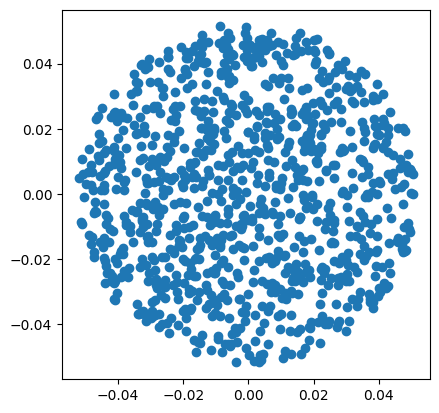

In [3]:
import numpy as np

def generate_random_unit_vectors(N, alpha):
    # Convert alpha from degrees to radians if it's in degrees
    alpha_rad = np.radians(alpha)

    # Generate random azimuthal angles between 0 and 2*pi
    azimuthal_angles = np.random.uniform(0, 2 * np.pi, N)

    # Generate random cosines of polar angles within the range specified by alpha
    cos_polar_angles = np.random.uniform(np.cos(alpha_rad), 1, N)
    polar_angles = np.arccos(cos_polar_angles)

    # Calculate the Cartesian coordinates of the unit vectors
    x = np.sin(polar_angles) * np.cos(azimuthal_angles)
    y = np.sin(polar_angles) * np.sin(azimuthal_angles)
    z = np.cos(polar_angles)

    # Stack the coordinates to form the final array of vectors
    vectors = np.stack((x, y, z), axis=-1)

    return vectors

# Example usage
N = 1000
alpha = 3  # Angle in degrees
vectors = generate_random_unit_vectors(N, alpha)
print(vectors.shape)

import matplotlib.pyplot as plt
plt.scatter(vectors[:, 0], vectors[:, 1])
plt.gca().set_aspect('equal')

In [4]:
## Tile vectors

allvec = np.tile(vectors, (4, 1, 1))
print(allvec.shape)

(4, 1000, 3)


In [5]:
print(rotation_matrices.shape)

(4, 3, 3)


In [6]:
# Perform the batch matrix-vector multiplication
# Shape (N, M, 3) = (N, 1, 3, 3) @ (N, M, 3, 1)
result = np.einsum('nij,nmj->nmi', rotation_matrices, allvec)

In [7]:
result.shape

(4, 1000, 3)

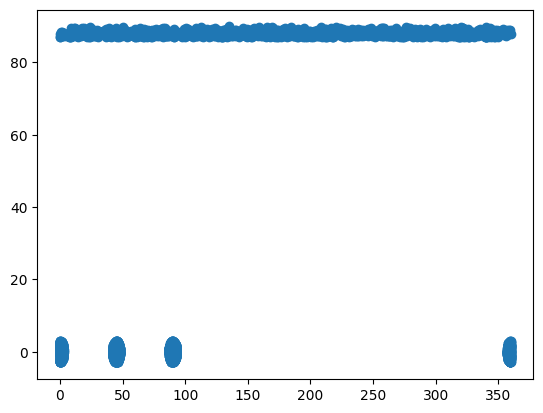

In [8]:
def cart_to_sph(xyz):
    x, y, z = xyz

    r = np.sqrt(x**2 + y**2 + z**2)
    ra = np.rad2deg( np.arctan2(y, x) )
    ra[ra < 0] = ra[ra < 0] + 360
    dec = np.rad2deg( np.arcsin(z/r) )

    return ra, dec

ra, dec = cart_to_sph(result.reshape(-1, 3).T)
import matplotlib.pyplot as plt
plt.scatter(ra, dec)

In [9]:
import healpy as hp

196608

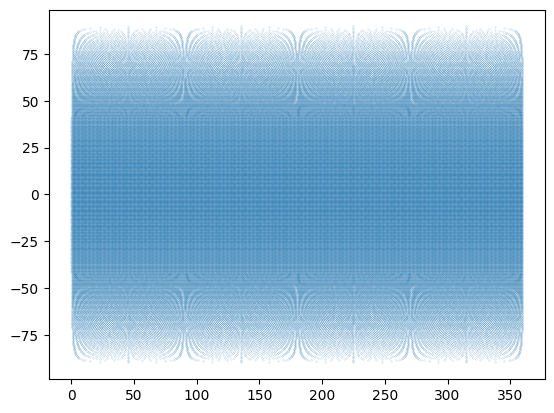

In [30]:
nside = 128
npix = hp.nside2npix(nside)
x, y, z = hp.pix2vec(nside, np.arange(npix), nest=True)

ra, dec = cart_to_sph((x, y, z))
import matplotlib.pyplot as plt
plt.scatter(ra, dec, s=0.01)

In [31]:
cos_alpha, np.cos(np.deg2rad(3))

(array([ 0.01041667,  0.02083333,  0.02083333, ..., -0.02083333,
        -0.02083333, -0.01041667]),
 0.9986295347545738)

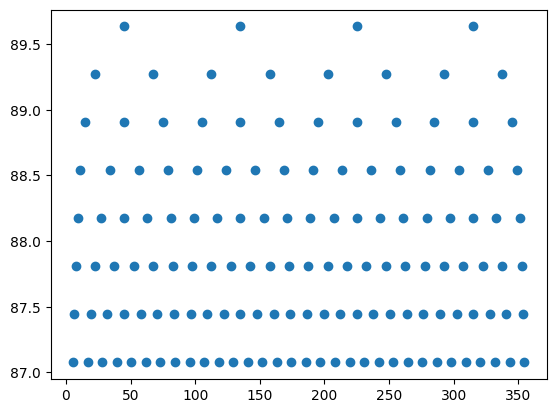

In [36]:
cos_alpha = z / np.sqrt(x*x + y*y + z*z)
m = cos_alpha > np.cos(np.deg2rad(3))

ra, dec = cart_to_sph((x[m], y[m], z[m]))
import matplotlib.pyplot as plt
plt.scatter(ra, dec)

Plan:
* Decompress all objects on a dense-ish grid (one obsv/hr?)
* For each, compute radius (from center of night to most distant observation)
* For each, compute earth distance and radius due to unknown observer
* Sum the two radii
* For each, grab the required number of points from the healpix grid that's within these radii
* Merge the array
* Rotate the points
* Convert to healpix & bin

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [6]:
import pickle
with open('comps.pkl', 'rb') as fp:
    comps = pickle.load(fp)
print(comps[0])

(60367.0, 60397.0)


In [7]:
import os, ephgen
from observatory import Observatories, mjd_tai_to_et
obs_file_path = os.path.join(ephgen.basepath, ephgen.OBSERVATORY_CODES)
observer = Observatories(obs_file_path).from_obscode("X05")

In [8]:
ephem, gm_sun, gm_total = ephgen.create_assist_ephemeris(ephgen.basepath)

In [4]:
import spiceypy as spice
ephgen.build_meta_kernel_file()
kfn = os.path.join(ephgen.basepath, ephgen.META_KERNEL)
spice.furnsh(kfn)

(tmin, tmax)=(60367.0, 60397.0)
(3, 10000, 24) (10000, 24) (10000, 24)


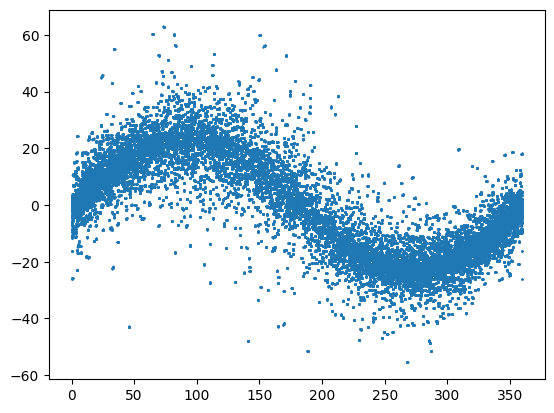

In [9]:
import numpy as np
from ephgen import create_sim, cart_to_sph

def get_obs(comps, times, observer, ephem, apply_ltcorr=True, lttol_msec=10, return_ephem=False, return_lt=False):
    # Compute the ephemerides of objects given in <comps>, at <times>, as they're
    # observed from the location of the <observer>.
    #
    # - comps: chebi+sv representation of the objects' trajectories
    # - times: times at which ephemerides are requested (MJD, TDB)
    # - observer: the Observer object
    # - ephem: the Ephem object for computing from state vectors
    #
    # Returns:
    # - (desig, xyz) or (desig, xyz, (ra, dec)
    # - desig is a list of designations
    # - xyz is the cartesian topocentric position, in AU. shape=(3, nobj, ntimes)
    # - ra/dec are in degrees, shape=(nobj, ntimes)
    #
    from simulation_constants import SPEED_OF_LIGHT
    assert not return_lt or apply_ltcorr, "get_obs: to return lt, apply_ltcorr must be set to True"

    (tmin, tmax), p, desig = comps
    times = np.atleast_1d(times)

    nobj = len(desig)
    ntimes = len(times)

    # extract state vectors and prepare sims
    svmask = p[0, 0, :] == np.inf
    havesv = svmask.any()

    if havesv:
        xvview = p.reshape(-1, nobj)
        xvall = xvview[1:8, svmask].T

        mjd_ref = ephem.jd_ref - 2400000.5
        sims = [ create_sim(ephem, xv) for xv in xvall ]
        nsv = len(sims)

    # compute observer barycentric position at requested times
    oxyz = np.atleast_2d(observer.barycentric(times)).T

    # initialize output array
    xyz = np.zeros((3, nobj, ntimes))

    # run until light-time difference is <lttol_msec msec
    # prepare the light-time correction array.
    lttol = lttol_msec / 1000. / 3600. / 24.
    lt = np.zeros(nobj, dtype='f8')
    d  = 0.

    # iterate over all times
    for ti, t in enumerate(times):
        t = np.full_like(lt, t) # convert to ndarray
        for _ in range(5):
            # chebys were fitted from 0 to 1
            f = (t - tmin - lt) / (tmax - tmin)
            assert np.all((0 <= f) & (f <= 1)), f"Time outside of interpolation range ({tmin=}, {tmax=}). {lt.max()=}, {np.max(d)=}."
    
            # compute the position at t_emit, for objects which have chebys
            # the context-manager suppressess warnings for objects that have
            # state vectors (and thus infs in some fields)
            with np.errstate(invalid='ignore'):
                xyz[:, :, ti] = np.polynomial.chebyshev.chebval(f, p, tensor=False)
    
            if havesv:
                # fix up objects which have state vectors, if any
                # we will propagate these using ASSIST.
                xyz2 = np.empty((3, len(sims)))
                t2 = t[svmask]
                for i, (sim, ex) in enumerate(sims):
                    ex.integrate_or_interpolate(t2[i] - mjd_ref)
                    xyz2[:, i] = sim.particles[0].xyz
                xyz[:, svmask, ti] = xyz2

            # compute topocentric position
            xyz[:, :, ti] -= oxyz[:, ti, np.newaxis]
            if not apply_ltcorr:
                # exit early if we don't need light correction
                break

            # compute distance, and the new estimate of
            # light travel time
            d = np.linalg.norm(xyz[:, :, ti], axis=0)
            ltprev = lt
            lt = d / SPEED_OF_LIGHT

            # check if we're converging
            dlt = np.abs(lt - ltprev)
            #print(f"{_} {(np.sort(dlt)*3600*24*1000)[::-1][:3]=}")
            if np.all(dlt < lttol):
                break
        else:
            assert False, "Runaway iteration in get_obs... something went wrong"

    ret = (desig, xyz)
    if return_ephem: ret += (cart_to_sph(xyz),)
    if return_lt:    ret += (lt,)
    return ret

import matplotlib.pyplot as plt
tmin, tmax = comps[0]
print(f"{(tmin, tmax)=}")
t = np.linspace(tmin+1, tmin+2, 24)
#t = np.linspace(tmin+1, tmax-1, 24)
#t = 0.5*(tmin+tmax)

desig, xyz, (ra, dec) = get_obs(comps, t, observer, ephem, return_ephem=True, apply_ltcorr=True)

plt.scatter(ra, dec, s=0.2)
print(f"{xyz.shape} {ra.shape} {dec.shape}")

In [10]:
%%timeit
get_obs(comps, t, observer, ephem, return_ephem=False, apply_ltcorr=True, lttol_msec=10)

126 ms ± 22.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
# Take the observation in the middle of the interval, and
# compute the on-sky distance between it and all other observations.
#
# We'll take the largest of those and approximate the areas where
# this object could've moved with a circle of that radius.

d = np.linalg.norm(xyz[:, :, :], axis=0)
a = xyz / d                   # unit vectors, (3, nobj, ntimes)
b = a[:, :, a.shape[2] // 2]  # reference vector, (3, nobj)

# This returns the dot product between each unit vector of
# the object, and its reference vector
result = np.einsum('ijk,ij->jk', a, b) # shape=(nobj, ntimes)

# Example for one object, in degrees
np.rad2deg(np.arccos(np.clip(result[1], -1, 1))), d[1, 0]

(array([0.09032338, 0.08300268, 0.07560512, 0.06813522, 0.06060227,
        0.05301969, 0.04540396, 0.03777344, 0.03014697, 0.0225425 ,
        0.01497572, 0.00745891, 0.        , 0.00739799, 0.01473718,
        0.02202471, 0.02927216, 0.03649472, 0.04371003, 0.0509369 ,
        0.05819389, 0.0654979 , 0.07286295, 0.0802991 ]),
 2.276604320617458)

In [13]:
# Let's take the maximum distance -- this will be the maximum motion
# in the given night.
rr = result.min(axis=1)
motion_alpha = np.arccos(np.clip(rr, -1, 1)) ## shape=(nobj,)
np.rad2deg(motion_alpha)[:10]

array([0.01955248, 0.09032338, 0.19005586, 0.1928702 , 0.17824275,
       0.29378016, 0.04224212, 0.07628266, 0.07717201, 0.21846985])

In [14]:
# But there's also the uncertainty due to the (hitherto unknown)
# location of the observer. We assume they'll be somewhere on
# Earth, and thus the on-sky location of the asteroid can't vary
# for more than the Earth radius relative to what it would be
# if observed from the Geocenter.

Re = 6_378 / 150_000_000 # Earth radius in AU (roughly)
earth_alpha = Re / d.min(axis=1)
np.rad2deg(earth_alpha)[:10]

array([0.00078746, 0.00107369, 0.0005827 , 0.00062003, 0.00060108,
       0.0007812 , 0.00096658, 0.00102581, 0.00063861, 0.00073582])

In [15]:
# The worst case scenario is to just add these two.

alpha = earth_alpha + motion_alpha
np.rad2deg(alpha)[:10]

array([0.02033994, 0.09139707, 0.19063855, 0.19349023, 0.17884383,
       0.29456136, 0.0432087 , 0.07730847, 0.07781063, 0.21920566])

In [16]:
# let's see the ones with largest motions
np.rad2deg(np.sort(alpha)[::-1][:10])

array([0.83923148, 0.83633511, 0.75455493, 0.73447566, 0.72347464,
       0.70100528, 0.68347853, 0.6470903 , 0.61494744, 0.60549882])

In [21]:
%%timeit
# Now we'll compute the healpix pixels where these objects could possibly
# land.
import healpy as hp
nside=128

# Each iteration of the comprehension computes the list of healpixes that may
# contain this object. In that list, we store both the healpix ID (in the upper
# 32 bits) and the object ID (in the lower 32 bits of each list item).
# This list-of-lists gets concatenated into a ndarray, and then sorted. This is
# effectivelly a sort on Healpix ID, since it's stored in the most significant
# bits of each value -- but together with it, the object IDs are carried in the
# least significant bits. This trick allows us to cheaply jointly sort the two.
idx_and_pix = [ (hp.query_disc(nside, b1, a1, nest=True, inclusive=True) << 32) + i for i, (a1, b1) in enumerate(zip(alpha, b.T)) ]
idx_and_pix = np.concatenate(idx_and_pix)
idx_and_pix.sort()

# Separate healpix and object IDs. The two arrays now carry tuples of
# (healpix ID, object ID).
ipix = idx_and_pix >> 32
i = idx_and_pix & 0x0000_0000_FFFF_FFFF


135 ms ± 9.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
class JaggedArray:
    def __init__(self, vals, offs):
        self.vals = vals
        self.offs = offs
        self.n = len(self.offs) - 1

    def __getitem__(self, i):
        return self.vals[self.offs[i]:self.offs[i+1]]

    def __repr__(self):
        ret = dict()
        for i in range(self.n):
            if self.offs[i] < self.offs[i+1]:
                ret[i] = self[i]
        return repr(ret)
    
    def __len__(self):
        return self.n

    @staticmethod
    def from_sorted_kv_arrays(k, v, n):
        # input: ndarrays of keys (k) and values (v), of the same
        # length, representing (k, v) tuples. Keys are allowed to repeat.
        # The argument `n` is the maximum allowable value of k (note: it
        # does not have to appear in k).
        vals = v

        uk, limits, counts = np.unique(k, return_index=True, return_counts=True)
        offs = np.zeros(n+1, dtype=int)
        offs[uk] = limits
        offs[uk+1] = limits + counts
        repeat_offsets(offs)

        return JaggedArray(vals, offs)

# FIXME: find a way to do this w/o numba
from numba import njit
@njit(cache=True)
def repeat_offsets(offs):
    prev = 0
    for i, v in enumerate(offs):
        if v == 0:
            offs[i] = prev
        else:
            prev = offs[i]

h2l = JaggedArray.from_sorted_kv_arrays(ipix, i, hp.nside2npix(nside))

In [23]:
%%timeit
# We next store them into a jagged array, allowing fast and memory-efficient 
# dict-like search for objects in a healpix pixel
h2l = JaggedArray.from_sorted_kv_arrays(ipix, i, hp.nside2npix(nside))

1.24 ms ± 22.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [24]:
## Validate this works correctly

idx_and_pix = [ (hp.query_disc(nside, b1, a1, nest=True, inclusive=True) << 32) + i for i, (a1, b1) in enumerate(zip(alpha, b.T)) ]
idx_and_pix = np.concatenate(idx_and_pix)
idx_and_pix.sort()

ipix = idx_and_pix >> 32
i = idx_and_pix & 0x0000_0000_FFFF_FFFF

from collections import defaultdict
vv = defaultdict(list)
for ipix1, i1 in zip(ipix, i):
    vv[ipix1].append(i1)

for k in range(len(h2l)):
    vvx = np.array(vv[k], dtype=int)
    assert len(h2l[k]) == len(vvx), (k, h2l[k], vvx)
    assert set(h2l[k]) == set(vvx), (k, h2l[k], vvx)
print("All OK!")

All OK!
